In [ ]:
import pandas as pd
import numpy as np

In [ ]:
netflix_df = pd.read_csv("netflix_titles.csv")
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


Enlists 8800+ movies and tv shows alongside other information which describes the movie/tv show.

In [ ]:
netflix_dtypes = netflix_df.dtypes
netflix_dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

The dataset, as seen above, is an object containing a list of columns. All columns (features) are objects except the column named release_year which is an int64 data.

Unfortunately, the pandas library was not able to correctly identify the date_added and duration since these features requires additional treatment such as data conversion.

In [ ]:
profile = [[] for _ in range(2)]
for item in netflix_dtypes:
  if np.issubdtype(item, np.integer):
    profile[0].append('int64')
    profile[1].append('numerical')
  else:
    profile[0].append('object')
    profile[1].append('categorical')

profiles_df = pd.DataFrame({
    "Features": netflix_df.columns.tolist(),
    "Data_Type": profile[0],
    "Profile": profile[1]
})

profiles_df

,Features,Data_Type,Profile
0,show_id,object,categorical
1,type,object,categorical
2,title,object,categorical
3,director,object,categorical
4,cast,object,categorical
5,country,object,categorical
6,date_added,object,categorical
7,release_year,int64,numerical
8,rating,object,categorical
9,duration,object,categorical


[Detecting any types of integer - source material](https://stackoverflow.com/questions/37726830/how-to-determine-if-a-number-is-any-type-of-int-core-or-numpy-signed-or-not) <br/>
[How to create a number of empty nested lists in python](https://stackoverflow.com/questions/19249201/how-to-create-a-number-of-empty-nested-lists-in-python)

Here are some possible use for this dataset:

<ol>
  <li>Count of each type: Movie or TV Show</li>
  <li>Count of both TV shows and Movies directed by the same person</li>
  <li>Count of both TV shows and Movies casting the same person</li>
  <li>Count of both TV shows and Movies produced on the same country</li>
  <li>Count of both TV shows and Movies released on the same year</li>
  <li>Count of both TV shows and Movies added on the same date</li>
  <li>Count of both TV shows and Movies with the same ratings</li>
  <li>Descriptive statistics on the duration of both TV shows and Movies <br/><small>(provided that this feature is treated)</small></li>
  <li>Count of both TV shows and Movies under the same genre</li>
  <li>Oldest and latest Movie or TV show based on release date</li>
  <li>Oldest and latest Movie or TV show being shown on Netflix based on date added <br/><small>(provided that this feature is treated)</small></li>
</ol>

Here is a sample visualization using the dataset of Netflix:

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

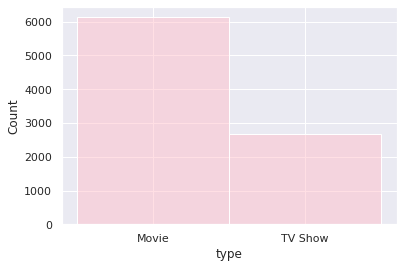

In [ ]:
sns.set(style="darkgrid")

sns.histplot(data=netflix_df, color="pink", x="type", alpha=0.5)
plt.show()

The above visualization shows the count of movies and TV shows for this dataset. This shows that more than half of the data within this dataset are movies.